# RANDOM FOREST REGRESSOR.

Random forest algorithm is a supervised machine learning technique that uses decision tree as its base for prediction. It ensembles multiple decision trees together and aggregates/votes values to estimate the values. When training each estimator, it introduces random trees that run parallel and do not interact with each other during tree building. This model can perform both classification and regression but we are going to test the latter. 

By combining multiple models, this algorithm achieves higher prediction accuracy and optimisation by reducing variance across models. Random forest uses bagging technique(ensemble type) where multiple models run independently in parrallel then their values averged to give an outcome. Boosting on the other end learns sequentially and corrects errors at each step to imrove stability of a model. It adapts to the model.  

Random forest regressor learns by building many decision tress, mostly 100's, then finds the average regression of all trees. Original data is brocken into small subsets (tuples) iteratively, in each, an observation is selected through row sampling with replacement method (boostraping). A model is then created and learns from each training sample and then returns an outcome. The model then counts all values and the one having most occurance is assigned to an unknown value X, this is bagging.  Individual decision trees have high varaiance, but when they are combined in parrallel then the resulting variance is greatly reduced since each model is trained perfectly on different  sample data. Accuracy is higher becaused a decision is pegged on multiple models (no dependence on a single model). 

Random Forest is generally more accurate and robust than regression. It is also less prone to overfitting because it emphasises on the element of randomness which means that it is more likely to generalize well to new data. This also ensures that the tree are NOT correlated as much as possible. 

Random forests is designed to handle shortfalls from decision tree, this includes ;

- Decision trees are prone to overfitting because of high variances in single models. With random forests, variance is reduced by running and ensemble of decisions tree models.
- Decision tree model is highly sensitive, minor changes in the original data can give a completly different prediction making them very unstable.  




Like any other machine learning process, the steps are as follows ;

1. Define a problem - predict US election voter turnout for the 2020.
2. Access data in the appropriate format for python language 
3. Study the data to correct anomalies such as missing values that may hinder you from achieving the objective.
4. Create a machine learning model, random forest regressor will be used.
5. Train the model to understand relationship betweem predictor and target variables. 
6. Test your model and evaluate performance. 
7. Refine your model to suite your objectives - get more data, use a different technique, add parameters.
8. Finally interpret the data gained and report as needed. 


We need an algorithm that will predict the voter turnout for the year 2020 election based on independent variables such as previous turnout , income and age all aggregated at county level. 

In [2]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation.

In [22]:
# Load data 
# Read data containing county polygons. 
data = gpd.read_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_County_Elections_Projected')

# Reproject data 
data = data.to_crs(epsg=3857)


# Rename columns 
data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)



print(f'SHAPE OF POLYGON : {data.shape} \n ----------------\n\
       COORDINATE REFERENCE SYSTEM : {data.crs}\n--------------------\n\
      Columns : {data.columns}')

SHAPE OF POLYGON : (3108, 88) 
 ----------------
       COORDINATE REFERENCE SYSTEM : EPSG:3857
--------------------
      Columns : Index(['county_fip', 'fips', 'name', 'population', 'population_persqmile',
       'sqmi', 'state_abbr', 'state_fips', 'state_name', 'county_FIPS',
       'totalvotes_2008', 'totalvotes_2012', 'totalvotes_2016',
       'totalvotes_2020', 'cvap_est_2008', 'cvap_est_2012', 'cvap_est_2016',
       'cvap_est_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', 'voter_turnout_dem_2008',
       'voter_turnout_dem_2012', 'voter_turnout_dem_2016',
       'voter_turnout_dem_2020', 'voter_turnout_gop_2008',
       'voter_turnout_gop_2012', 'voter_turnout_gop_2016',
       'voter_turnout_gop_2020', 'per_diff_dem_vs_gop_2008',
       'per_diff_dem_vs_gop_2012', 'per_diff_dem_vs_gop_2016',
       'per_diff_dem_vs_gop_2020', 'rawdiff_dem_vs_gop_2008',
       'rawdiff_dem_vs_gop_2012', 'rawdiff_dem_vs_gop_2016',
       'ra

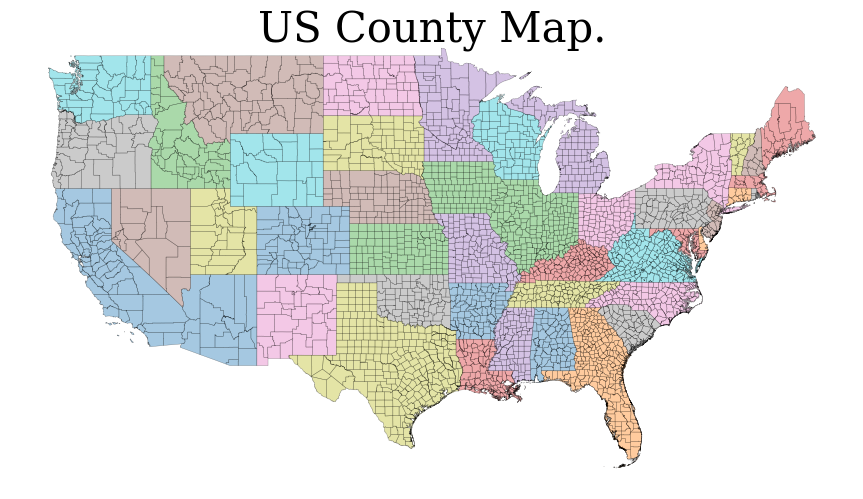

In [23]:
# Plot data  

fig, ax = plt.subplots(figsize=(14, 6))

data.plot(column='state_name',        # Colour based on state 
                #categorical=True,
                legend=False,
                ax=ax,
                edgecolor='black', linewidth=0.3, alpha=0.4)

# Adjust legend location
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.15,0.5))

# Remove Axis 
ax.set_axis_off()

# Title 
ax.set_title("US County Map.", fontweight="medium", size=30, y=0.95, color='black', fontfamily='serif')

plt.show()

In [ ]:
# Rename columns 

# Rename columns 

data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)

print(data.columns)